# Histogram Analysis
---
The goal of this notebook is to look at the 7 sensors that contain histogram data. 

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import f1_score, confusion_matrix

In [148]:
data = pd.read_csv('equip_failures_training_set.csv', na_values=['na'], dtype=np.float64)

## Data Preprocessing
---
Here we do some basic methods to preprocess the data and reduce dimensionality using PCA. 

In [149]:
threshold = 1.0 * len(data['target'])
cols = []

for col in data.columns:
    if 'histogram' not in col and 'target' not in col:
        cols.append(col)
        
        
data.drop(columns=cols, inplace=True, axis=1)
data.fillna(value=0.0, inplace=True)
data.describe(include='all')

target  sensor7_histogram_bin0  sensor7_histogram_bin1  \
count  60000.000000            6.000000e+04            6.000000e+04   
mean       0.016667            2.191577e+02            9.648104e+02   
std        0.128020            2.036364e+04            3.400891e+04   
min        0.000000            0.000000e+00            0.000000e+00   
25%        0.000000            0.000000e+00            0.000000e+00   
50%        0.000000            0.000000e+00            0.000000e+00   
75%        0.000000            0.000000e+00            0.000000e+00   
max        1.000000            3.376892e+06            4.109372e+06   

       sensor7_histogram_bin2  sensor7_histogram_bin3  sensor7_histogram_bin4  \
count            6.000000e+04            6.000000e+04            6.000000e+04   
mean             8.509771e+03            8.760054e+04            4.322084e+05   
std              1.494818e+05            7.575171e+05            2.361416e+06   
min              0.000000e+00            0.000000e+00            0.000000e+00   
25%              0.000000e+00            0.000000e+00            2.820000e+02   
50%              0.000000e+00            0.000000e+00            3.486000e+03   
75%              0.000000e+00            0.000000e+00            4.812400e+04   
max              1.055286e+07            6.340207e+07            2.288306e+08   

       sensor7_histogram_bin5  sensor7_histogram_bin6  sensor7_histogram_bin7  \
count            6.000000e+04            6.000000e+04            6.000000e+04   
mean             1.095979e+06            1.639278e+06            4.937259e+05   
std              3.246405e+06            3.891369e+06            1.415760e+06   
min              0.000000e+00            0.000000e+00            0.000000e+00   
25%              1.237750e+04            9.294000e+03            0.000000e+00   
50%              1.678850e+05            8.820040e+05            1.114850e+05   
75%              9.010595e+05            1.876629e+06            5.830555e+05   
max              1.791880e+08            9.402067e+07            6.334675e+07   

       sensor7_histogram_bin8  ...  sensor105_histogram_bin0  \
count            6.000000e+04  ...              6.000000e+04   
mean             3.517210e+04  ...              7.252023e+05   
std              2.189498e+05  ...              2.403855e+06   
min              0.000000e+00  ...              0.000000e+00   
25%              0.000000e+00  ...              1.463500e+04   
50%              1.563000e+03  ...              2.552520e+05   
75%              2.613400e+04  ...              5.666070e+05   
max              1.770252e+07  ...              7.498445e+07   

       sensor105_histogram_bin1  sensor105_histogram_bin2  \
count              6.000000e+04              6.000000e+04   
mean               7.751083e+05              4.405077e+05   
std                2.557028e+06              1.150015e+06   
min                0.000000e+00              0.000000e+00   
25%                8.022000e+03              2.662000e+03   
50%                3.387100e+05              2.280220e+05   
75%                6.593330e+05              4.350315e+05   
max                9.822438e+07              7.793393e+07   

       sensor105_histogram_bin3  sensor105_histogram_bin4  \
count              6.000000e+04              6.000000e+04   
mean               2.087653e+05              4.407495e+05   
std                5.407282e+05              1.162708e+06   
min                0.000000e+00              0.000000e+00   
25%                1.024000e+03              2.288000e+03   
50%                1.088190e+05              2.153240e+05   
75%                2.164440e+05              4.624655e+05   
max                3.775839e+07              9.715238e+07   

       sensor105_histogram_bin5  sensor105_histogram_bin6  \
count              6.000000e+04              6.000000e+04   
mean               3.895406e+05              3.293335e+05   
std                1.115528e+06              1.063741

Visualizations of different sensor histograms

(array([7., 0., 0., 1., 1., 0., 0., 0., 0., 1.]),
 array([      0. ,  146283.6,  292567.2,  438850.8,  585134.4,  731418. ,
         877701.6, 1023985.2, 1170268.8, 1316552.4, 1462836. ]),
 <a list of 10 Patch objects>)

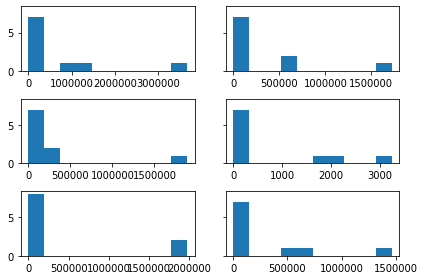

In [167]:
sensor7 = data.loc[:, 'sensor7_histogram_bin0':'sensor7_histogram_bin9']
n_bins = 10

figs, axs = plt.subplots(3, 2, sharey=True, tight_layout=True)

axs[0][0].hist(sensor7.loc[0, :], bins=n_bins)
axs[0][1].hist(sensor7.loc[1, :], bins=n_bins)
axs[1][0].hist(sensor7.loc[2, :], bins=n_bins)
axs[1][1].hist(sensor7.loc[3, :], bins=n_bins)
axs[2][0].hist(sensor7.loc[4, :], bins=n_bins)
axs[2][1].hist(sensor7.loc[5, :], bins=n_bins)

Train test split

In [168]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

X = data.loc[:, 'sensor7_histogram_bin0'::]
y = data['target']

X = scaler.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

## Principal Component Analysis
---
Performing PCA on the extracted dataset.

In [169]:
from sklearn.decomposition import PCA

n_comp = 7

pca_train = PCA(n_components=n_comp).fit_transform(x_train)
pca_test = PCA(n_components=n_comp).fit_transform(x_test)
pca = PCA(n_components=n_comp).fit(X)

In [170]:
pca.explained_variance_ratio_

array([0.39177533, 0.08294132, 0.04857237, 0.04011399, 0.03684618,
       0.03309344, 0.02426035])

## Random Forest Classifier
---


In [171]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(max_depth=5)
rf_model.fit(pca_train, y_train) # x_train

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [172]:
y_pred_test = rf_model.predict(pca_test)
print(f1_score(y_pred=y_pred_test, y_true=y_test))
print(confusion_matrix(y_pred=y_pred_test, y_true=y_test))

0.3636363636363636
[[11766    50]
 [  132    52]]


## Support Vector Machine
---


In [173]:
from sklearn.svm import SVC

svm_model = SVC(gamma='auto')
svm_model.fit(pca_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [174]:
y_pred_test = svm_model.predict(pca_test)
print(f1_score(y_pred=y_pred_test, y_true=y_test))
print(confusion_matrix(y_pred=y_pred_test, y_true=y_test))

0.031088082901554404
[[11810     6]
 [  181     3]]


## Logisitic Regression
---


In [175]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(pca_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [176]:
y_pred_test = log_model.predict(pca_test)
print(f1_score(y_pred=y_pred_test, y_true=y_test))
print(confusion_matrix(y_pred=y_pred_test, y_true=y_test))

0.3428571428571429
[[11739    77]
 [  130    54]]


## Keras Model
---
The goal behind this model is to serialize all histogram data into a vector of shape (70,). This vector will be fed into the model and a one-hot encoded vector with two elements will be the output

In [228]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [229]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=70))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 32)                2272      
_________________________________________________________________
dropout_8 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_9 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 2)                 66        
Total params: 3,394
Trainable params: 3,394
Non-trainable params: 0
_________________________________________________________________


In [230]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

Now we need to reshape the data so that it can be trained using the model

In [231]:
from keras.utils import to_categorical

model.fit(x_train, to_categorical(y_train), epochs=15)

Epoch 1/15
48000/48000 [==============================] - 2s 43us/step - loss: 0.0984 - acc: 0.9816
Epoch 2/15
48000/48000 [==============================] - 2s 36us/step - loss: 0.0576 - acc: 0.9845
Epoch 3/15
48000/48000 [==============================] - 2s 36us/step - loss: 0.0509 - acc: 0.9854
Epoch 4/15
48000/48000 [==============================] - 2s 35us/step - loss: 0.0477 - acc: 0.9868
Epoch 5/15
48000/48000 [==============================] - 2s 35us/step - loss: 0.0458 - acc: 0.9867
Epoch 6/15
48000/48000 [==============================] - 2s 35us/step - loss: 0.0445 - acc: 0.9873
Epoch 7/15
48000/48000 [==============================] - 2s 36us/step - loss: 0.0429 - acc: 0.9881
Epoch 8/15
48000/48000 [==============================] - 2s 36us/step - loss: 0.0409 - acc: 0.9886
Epoch 9/15
48000/48000 [==============================] - 2s 36us/step - loss: 0.0411 - acc: 0.9887
Epoch 10/15
48000/48000 [==============================] - 2s 35us/step - loss: 0.0404 - acc: 0.9887

In [234]:
score = model.evaluate(x_test, y_test, batch_size=32)
print(score)

'''
y_pred = model.predict(x_test)

f1_score(y_pred=to_categorical(y_pred), y_true=y_test)

print(y_test.reshape(12000,2,))
print(to_categorical(y_pred).shape)
print(to_categorical(y_pred).reshape(12000, 2))
'''

12000/12000 [==============================] - 0s 16us/step
[0.03715522707781444, 0.9896666666666667]


'\ny_pred = model.predict(x_test)\n\nf1_score(y_pred=to_categorical(y_pred), y_true=y_test)\n\nprint(y_test.reshape(12000,2,))\nprint(to_categorical(y_pred).shape)\nprint(to_categorical(y_pred).reshape(12000, 2))\n'

## References
---
https://pdfs.semanticscholar.org/b8c8/347f9c33935b97703ecd35a67af5c5508487.pdf

https://arxiv.org/pdf/1202.1436.pdf

https://arxiv.org/pdf/1303.6199.pdf

https://link.springer.com/chapter/10.1007/978-3-642-13312-1_1           